In [1]:
import pandas as pd
import numpy as np
from ofxparse import OfxParser
import matplotlib.pyplot as plt
import os

In [2]:
def get_files(filetype):
    files = []
    for f in os.listdir('statements/'):
        if not f.startswith('.') and "." + filetype in f: 
            files.append("statements/" + f)
    
    return files

In [3]:
def get_transactions(filename):
    with open(filename) as f:
        ofx = OfxParser.parse(f)

    account = ofx.account
    statement = account.statement
    transactions = statement.transactions

    return transactions

In [8]:
df = pd.DataFrame(columns=['date', 'year', 'month', 'day', 'description', 'debit', 'credit'])

files = get_files("ofx")

for f in files:
    for t in get_transactions(f):
        if t.type == "debit":
            new = {'date':t.date, 'year': t.date.year, 'month': t.date.month, 'day': t.date.day, 'description': t.memo, 'debit': t.amount, 'credit': 0}
        else:
            new = {'date':t.date, 'year': t.date.year, 'month': t.date.month, 'day': t.date.day, 'description': t.memo , 'debit': 0, 'credit': t.amount}
        df = df.append(new, ignore_index=True)

df = df.astype({"description": str, "debit": float, "credit": float})

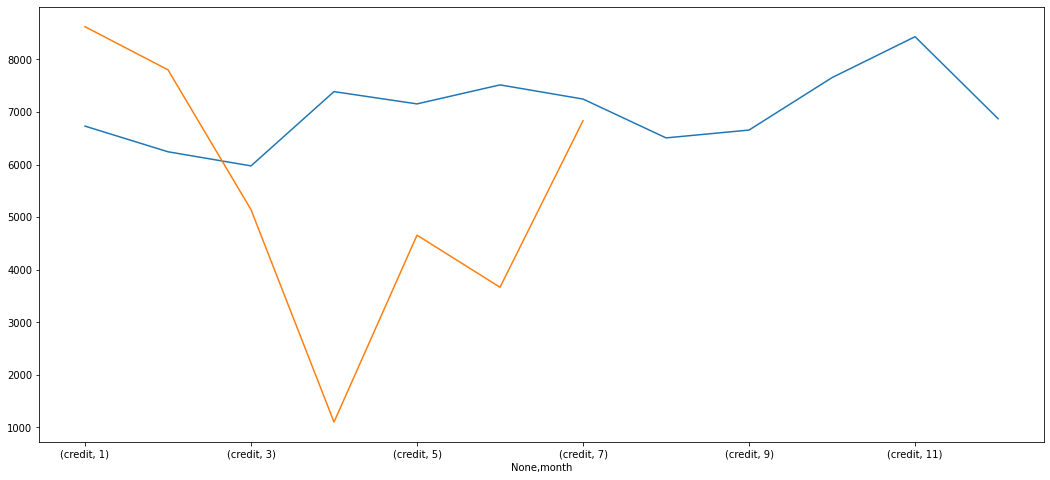

In [12]:
# df.groupby(['year', 'month'])['credit'].sum()

plt.figure(figsize=(18,8))
dff = df[~(df.credit == 0)][['date', 'year', 'month', 'credit']]

x = dff.groupby(['year', 'month']).sum().unstack()

x.loc[2019].plot()
x.loc[2020].plot()
plt.show()